Shape: (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


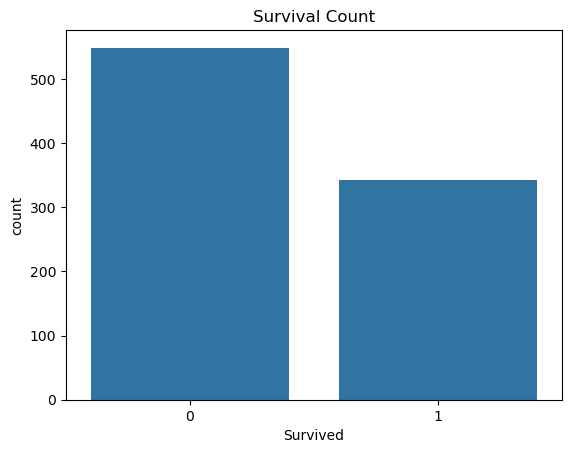

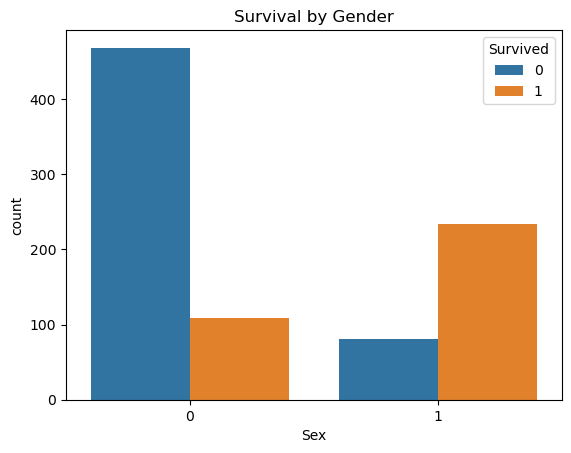

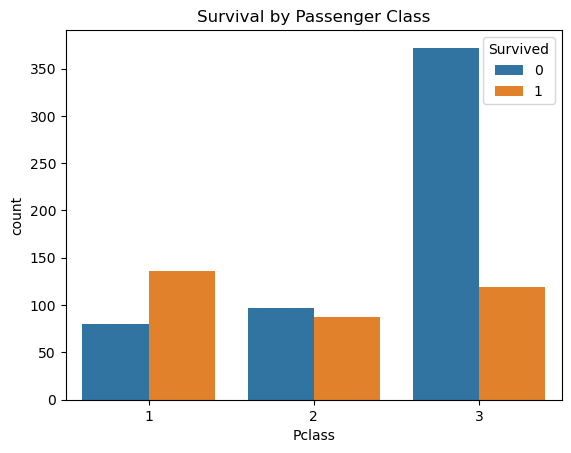

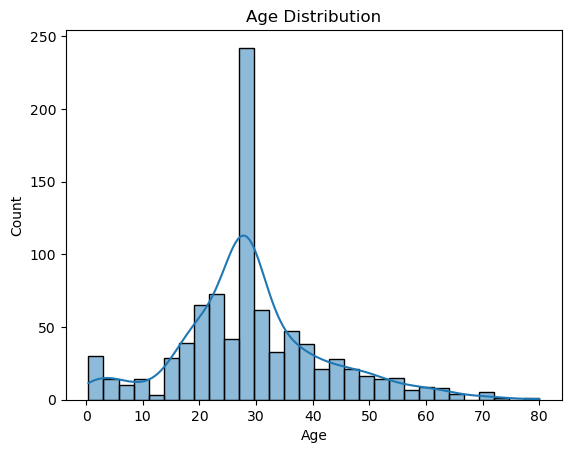

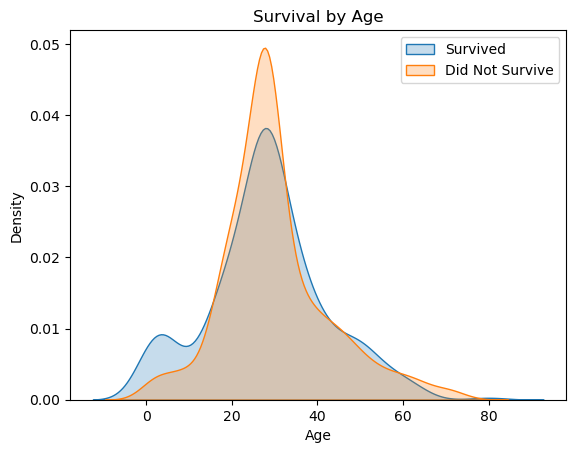

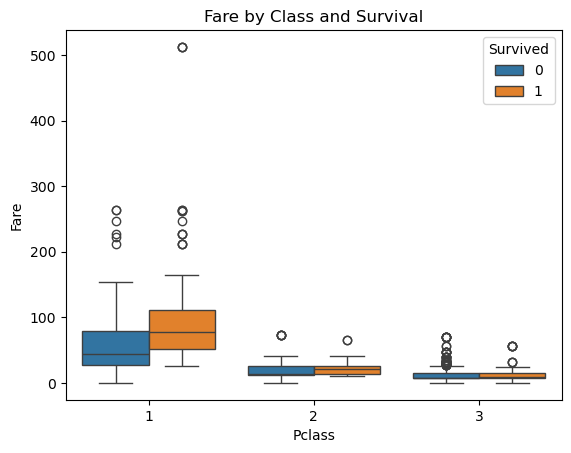

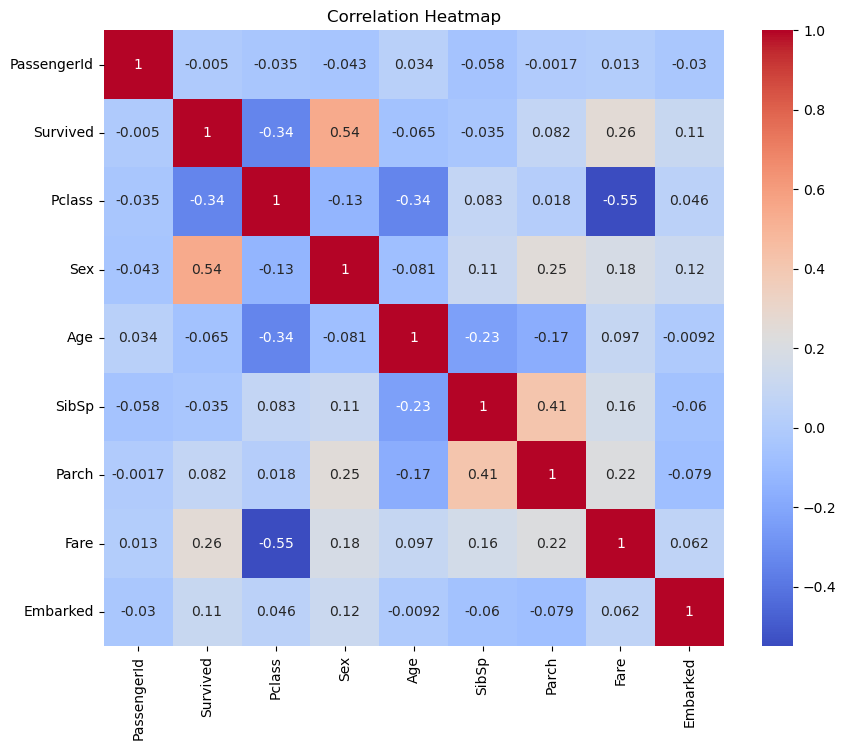

In [15]:
# 🛳️ Titanic Dataset - Exploratory Data Analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load the dataset
df = pd.read_csv(r"C:\Users\Nancy\Downloads\train.csv")  # Update this path if needed
df.head()

# Shape and structure
print("Shape:", df.shape)
df.info()

# Summary statistics
df.describe(include='all')

# Missing values
df.isnull().sum()
# Fill missing 'Age' with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill 'Embarked' with most common value
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop 'Cabin' (too many missing values)
df.drop(columns=['Cabin'], inplace=True)

# Convert categorical variables
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Drop Ticket and Name for simplicity in EDA
df.drop(columns=['Ticket', 'Name'], inplace=True)
#EXPLORATORY DATA ANALYSIS

#1 SURVIVAL COUNT
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

#2 SURVIVAL BY SEX
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Gender')
plt.show()

#3 SURVIVAL BY CLASS 
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Passenger Class')
plt.show()

#4 AGE DISTRIBUTION 
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

#5 SURVIVAL BY AGE
sns.kdeplot(df[df['Survived']==1]['Age'], label='Survived', fill=True)
sns.kdeplot(df[df['Survived']==0]['Age'], label='Did Not Survive', fill=True)
plt.title('Survival by Age')
plt.legend()
plt.show()

#6 FARE BY CLASS AND SURVIVAL 
sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=df)
plt.title('Fare by Class and Survival')
plt.show()

#7CORRELATION HEATMAP
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

df.to_csv(r"C:\Users\Nancy\anaconda3\dataa\titanic_cleaned.csv", index=False)





## 🔍 Observations

- **Gender**: Females had a much higher survival rate.
- **Class**: First-class passengers survived more.
- **Age**: Children were more likely to survive.
- **Fare**: Higher-paying passengers (1st class) had better survival chances.
